<a href="https://colab.research.google.com/github/cepdnaclk/e19-co544-Bitcoin-Transaction-Analysis-for-Ransomware-Identification/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Import the dataset

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
bitcoin_dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning Project/BitcoinHeistData.csv')

Convert the dataset into binary classification problem

In [ ]:
# Define a function to convert labels to binary
def convert_to_binary(label):
    if label == 'white':
        return 0  # Assign 0 for 'White' class
    else:
        return 1  # Assign 1 for 'Ransomware' class

# Apply the function to create a new binary label column
bitcoin_dataset['Binary_Label'] = bitcoin_dataset['label'].apply(convert_to_binary)

# Check the updated DataFrame
print(bitcoin_dataset.head())

                              address  year  day  length    weight  count  \
0   111K8kZAEnJg245r2cM6y9zgJGHZtJPy6  2017   11      18  0.008333      1   
1  1123pJv8jzeFQaCV4w644pzQJzVWay2zcA  2016  132      44  0.000244      1   
2  112536im7hy6wtKbpH1qYDWtTyMRAcA2p7  2016  246       0  1.000000      1   
3  1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7  2016  322      72  0.003906      1   
4  1129TSjKtx65E35GiUo4AYVeyo48twbrGX  2016  238     144  0.072848    456   

   looped  neighbors       income            label  Binary_Label  
0       0          2  100050000.0  princetonCerber             1  
1       0          1  100000000.0   princetonLocky             1  
2       0          2  200000000.0  princetonCerber             1  
3       0          2   71200000.0  princetonCerber             1  
4       0          1  200000000.0   princetonLocky             1  


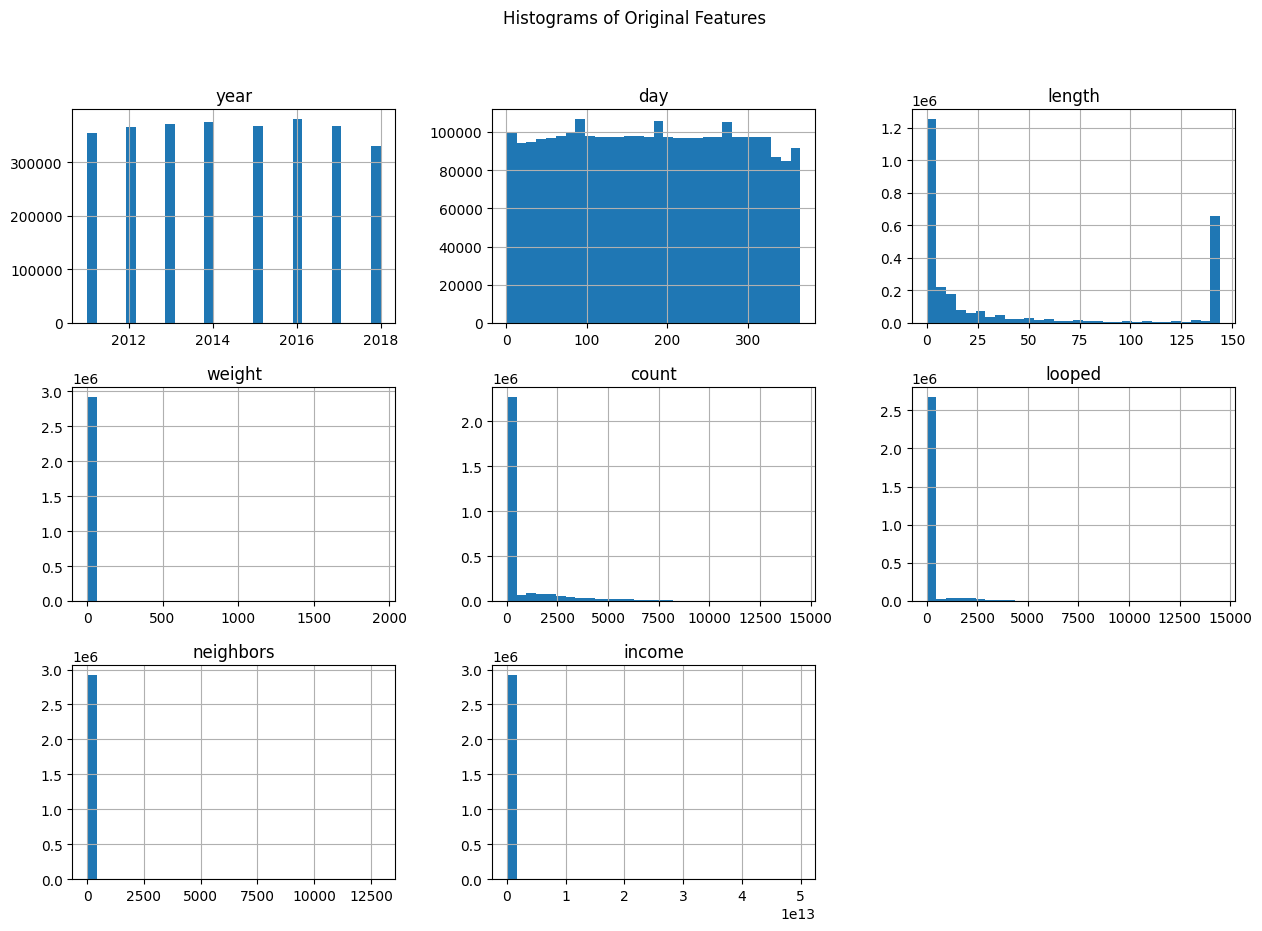

In [ ]:

# Plot histograms before normalization
features = ['year', 'day', 'length', 'weight', 'count', 'looped', 'neighbors', 'income']
bitcoin_dataset[features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Original Features')
plt.show()


Normalize each feature

Evaluate the performance of different transformations and selecting the best transformation for each feature


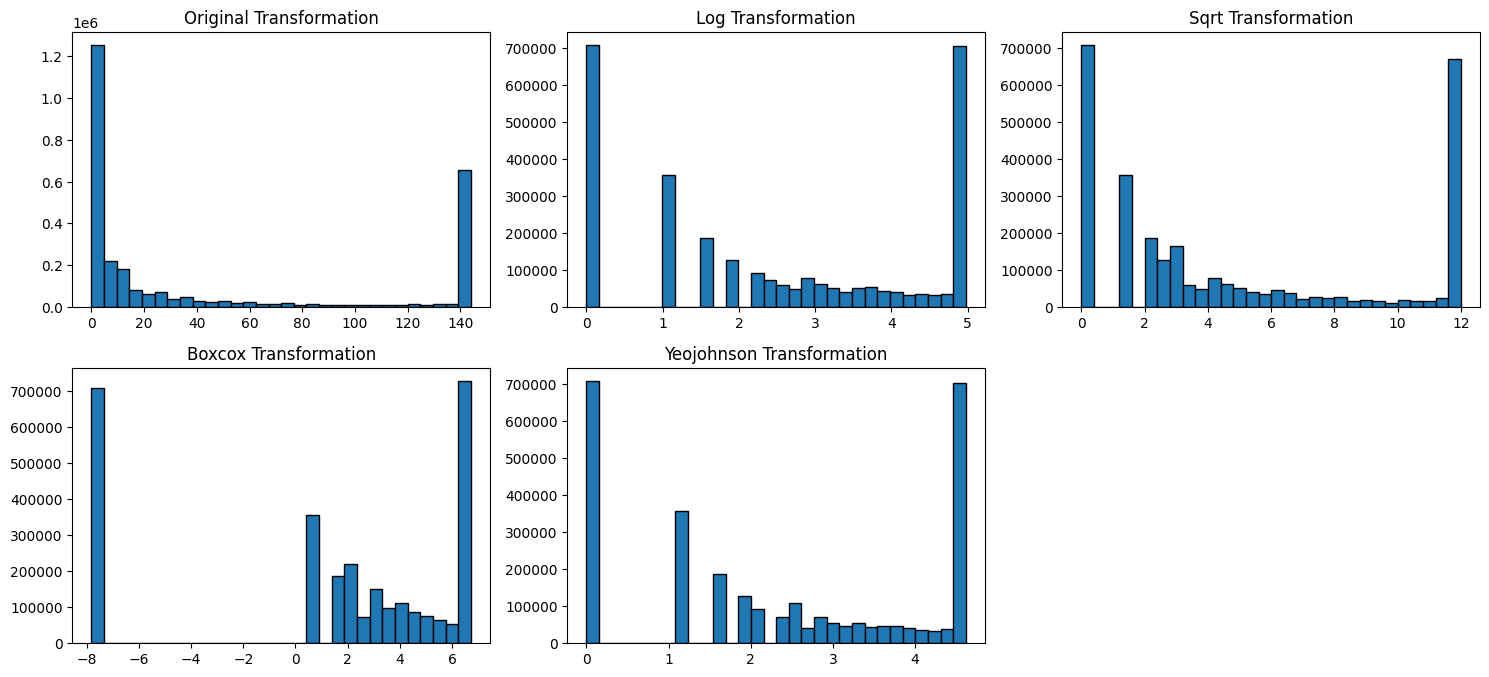

  Transformation                Skewness              Kurtosis
0       original                 0.92498              2.034796
1            log    [0.0733314196086153]   [1.523249799891655]
2           sqrt    [0.5752244883662514]  [1.7188871250841142]
3         boxcox   [-0.7484392277405733]  [2.0712539993335346]
4     yeojohnson  [0.028351169676782716]  [1.5260023163807535]


In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, boxcox, yeojohnson
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer


# Define transformation functions
def log_transform(x):
    return np.log1p(x)

def sqrt_transform(x):
    return np.sqrt(x)

def boxcox_transform(x):
    return boxcox(x + 1e-9)[0]  # Shift values to be positive if necessary

def yeojohnson_transform(x):
    return yeojohnson(x)[0]

# Apply transformations and add to DataFrame
transformations = {
    'log': log_transform,
    'sqrt': sqrt_transform,
    'boxcox': boxcox_transform,
    'yeojohnson': yeojohnson_transform
}

transformed_data_length = {'original': bitcoin_dataset['length']}
for name, func in transformations.items():
    transformed_data_length[name] = bitcoin_dataset[['length']].apply(func)


# Plot histograms of transformed features
plt.figure(figsize=(15, 10))
for i, (name, data) in enumerate(transformed_data_length.items()):
    plt.subplot(3, 3, i + 1)
    plt.hist(data, bins=30, edgecolor='k')
    plt.title(f'{name.capitalize()} Transformation')
plt.tight_layout()
plt.show()

#  Calculate skewness and kurtosis for each transformation
evaluation_metrics = pd.DataFrame(columns=['Transformation', 'Skewness', 'Kurtosis'])

for name, data in transformed_data_length.items():
    skewness = skew(data)
    kurt = kurtosis(data) + 3  # Adjusting to compare with normal kurtosis of 3
    new_row = pd.DataFrame({'Transformation': [name], 'Skewness': [skewness], 'Kurtosis': [kurt]})
    evaluation_metrics = pd.concat([evaluation_metrics, new_row], ignore_index=True)

print(evaluation_metrics)




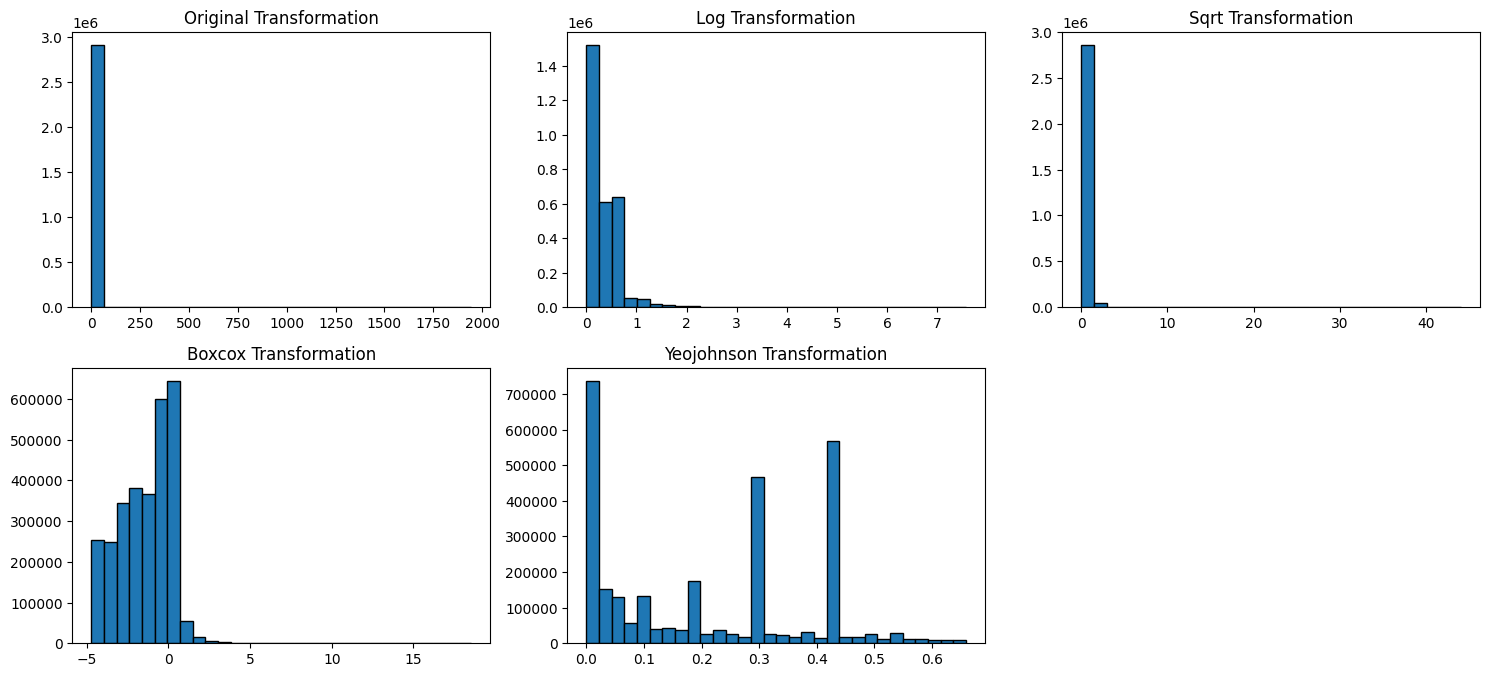

  Transformation               Skewness              Kurtosis
0       original             243.016514         102691.793003
1            log   [2.3648423069152336]  [18.268216757436935]
2           sqrt    [5.926036874374931]   [197.5751458518558]
3         boxcox  [-0.3105167864754885]   [3.126840426061745]
4     yeojohnson   [0.2352545864301524]   [1.681503115052721]


In [ ]:
# Apply transformations and add to DataFrame
transformations = {
    'log': log_transform,
    'sqrt': sqrt_transform,
    'boxcox': boxcox_transform,
    'yeojohnson': yeojohnson_transform
}

transformed_data_weight = {'original': bitcoin_dataset['weight']}
for name, func in transformations.items():
    transformed_data_weight[name] = bitcoin_dataset[['weight']].apply(func)


# Plot histograms of transformed features
plt.figure(figsize=(15, 10))
for i, (name, data) in enumerate(transformed_data_weight.items()):
    plt.subplot(3, 3, i + 1)
    plt.hist(data, bins=30, edgecolor='k')
    plt.title(f'{name.capitalize()} Transformation')
plt.tight_layout()
plt.show()

#  Calculate skewness and kurtosis for each transformation
evaluation_metrics = pd.DataFrame(columns=['Transformation', 'Skewness', 'Kurtosis'])

for name, data in transformed_data_weight.items():
    skewness = skew(data)
    kurt = kurtosis(data) + 3  # Adjusting to compare with normal kurtosis of 3
    new_row = pd.DataFrame({'Transformation': [name], 'Skewness': [skewness], 'Kurtosis': [kurt]})
    evaluation_metrics = pd.concat([evaluation_metrics, new_row], ignore_index=True)

print(evaluation_metrics)


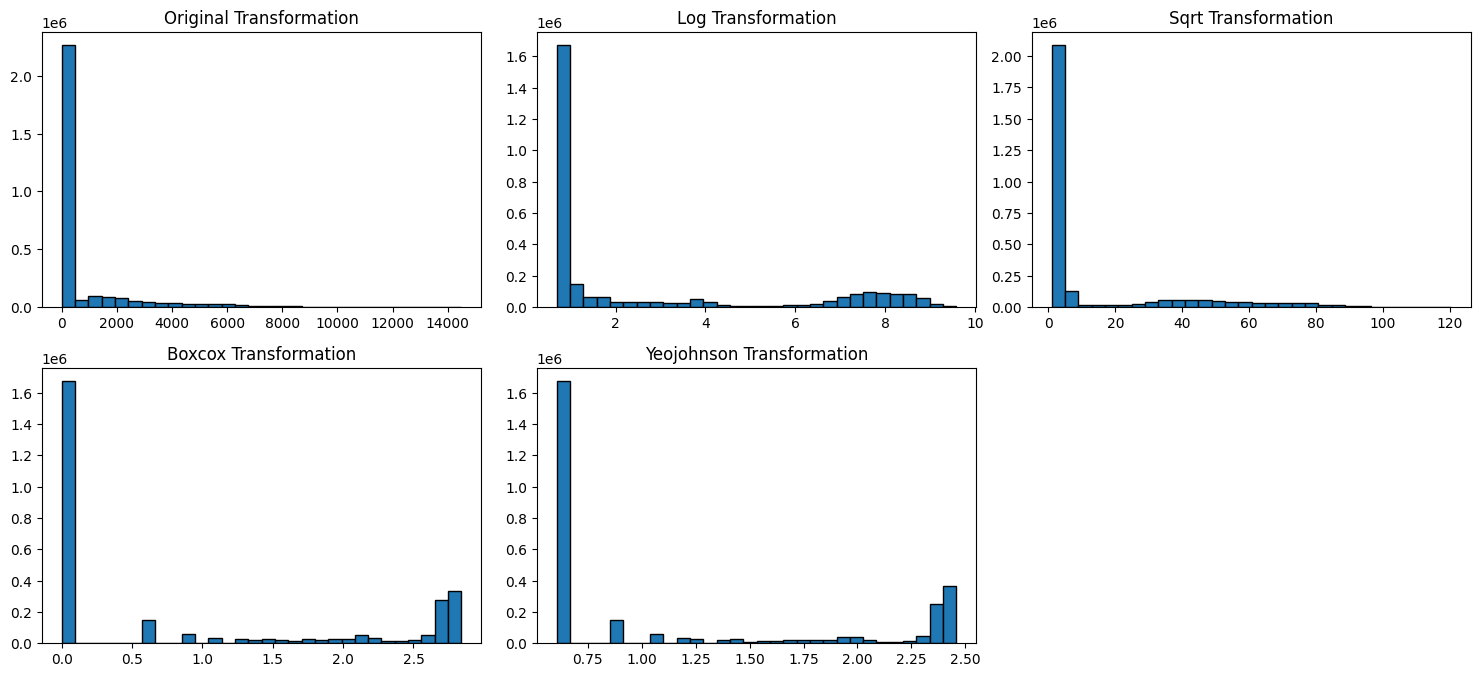

  Transformation              Skewness              Kurtosis
0       original              2.929664             12.424296
1            log   [1.123603910840599]   [2.509484489374252]
2           sqrt   [1.825123234525282]    [5.18044842622457]
3         boxcox  [0.7141245257264146]  [1.7013451613406925]
4     yeojohnson  [0.7794367522802628]   [1.785673084389271]


In [ ]:
# Apply transformations and add to DataFrame
transformations = {
    'log': log_transform,
    'sqrt': sqrt_transform,
    'boxcox': boxcox_transform,
    'yeojohnson': yeojohnson_transform
}

transformed_data_count = {'original': bitcoin_dataset['count']}
for name, func in transformations.items():
    transformed_data_count[name] = bitcoin_dataset[['count']].apply(func)


# Plot histograms of transformed features
plt.figure(figsize=(15, 10))
for i, (name, data) in enumerate(transformed_data_count.items()):
    plt.subplot(3, 3, i + 1)
    plt.hist(data, bins=30, edgecolor='k')
    plt.title(f'{name.capitalize()} Transformation')
plt.tight_layout()
plt.show()

#  Calculate skewness and kurtosis for each transformation
evaluation_metrics = pd.DataFrame(columns=['Transformation', 'Skewness', 'Kurtosis'])

for name, data in transformed_data_count.items():
    skewness = skew(data)
    kurt = kurtosis(data) + 3  # Adjusting to compare with normal kurtosis of 3
    new_row = pd.DataFrame({'Transformation': [name], 'Skewness': [skewness], 'Kurtosis': [kurt]})
    evaluation_metrics = pd.concat([evaluation_metrics, new_row], ignore_index=True)

print(evaluation_metrics)


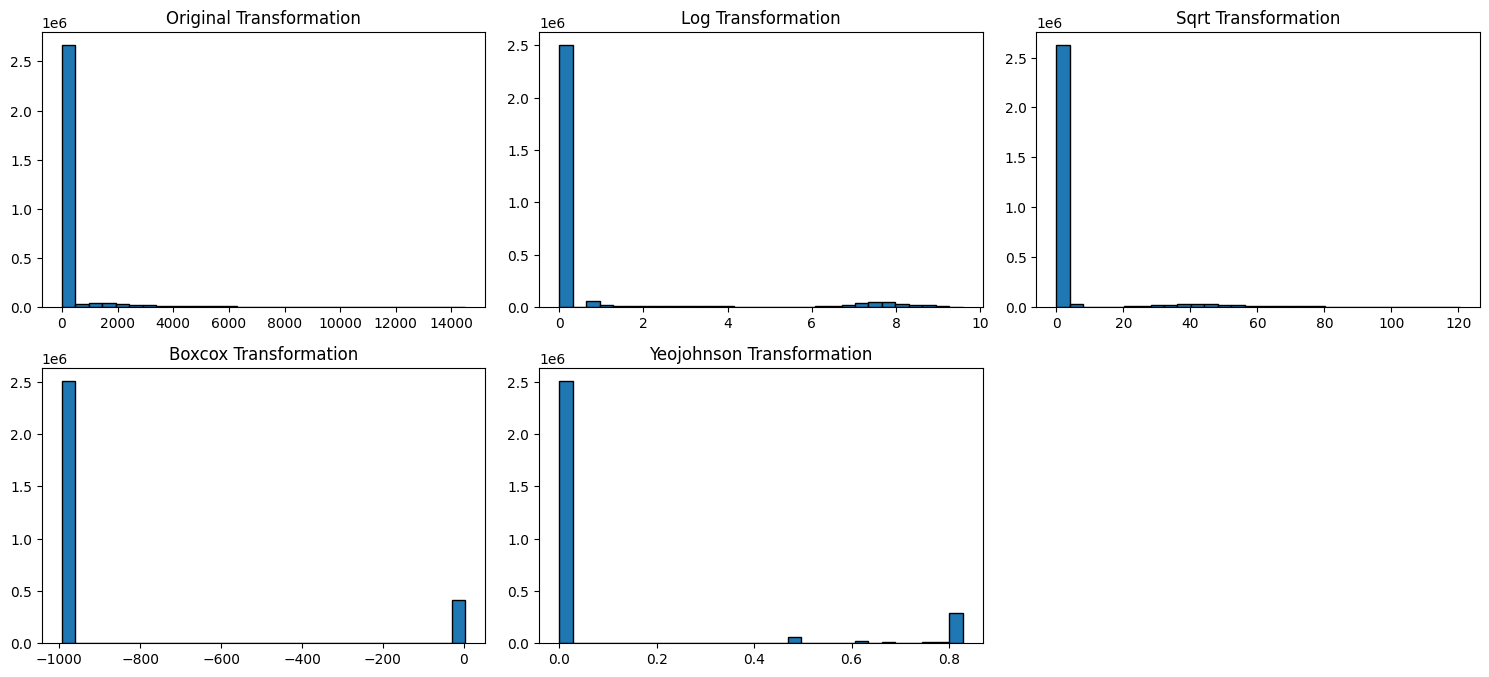

  Transformation              Skewness              Kurtosis
0       original              5.524711             40.244032
1            log   [2.773686135632499]     [9.0088964771689]
2           sqrt  [3.5982890341905582]  [15.829294655222462]
3         boxcox   [2.060799688029225]   [5.246910263796831]
4     yeojohnson  [2.1772168500683016]   [5.871862846500926]


In [ ]:
# Apply transformations and add to DataFrame
transformations = {
    'log': log_transform,
    'sqrt': sqrt_transform,
    'boxcox': boxcox_transform,
    'yeojohnson': yeojohnson_transform
}

transformed_data_looped = {'original': bitcoin_dataset['looped']}
for name, func in transformations.items():
    transformed_data_looped[name] = bitcoin_dataset[['looped']].apply(func)


# Plot histograms of transformed features
plt.figure(figsize=(15, 10))
for i, (name, data) in enumerate(transformed_data_looped.items()):
    plt.subplot(3, 3, i + 1)
    plt.hist(data, bins=30, edgecolor='k')
    plt.title(f'{name.capitalize()} Transformation')
plt.tight_layout()
plt.show()

#  Calculate skewness and kurtosis for each transformation
evaluation_metrics = pd.DataFrame(columns=['Transformation', 'Skewness', 'Kurtosis'])

for name, data in transformed_data_looped.items():
    skewness = skew(data)
    kurt = kurtosis(data) + 3  # Adjusting to compare with normal kurtosis of 3
    new_row = pd.DataFrame({'Transformation': [name], 'Skewness': [skewness], 'Kurtosis': [kurt]})
    evaluation_metrics = pd.concat([evaluation_metrics, new_row], ignore_index=True)

print(evaluation_metrics)


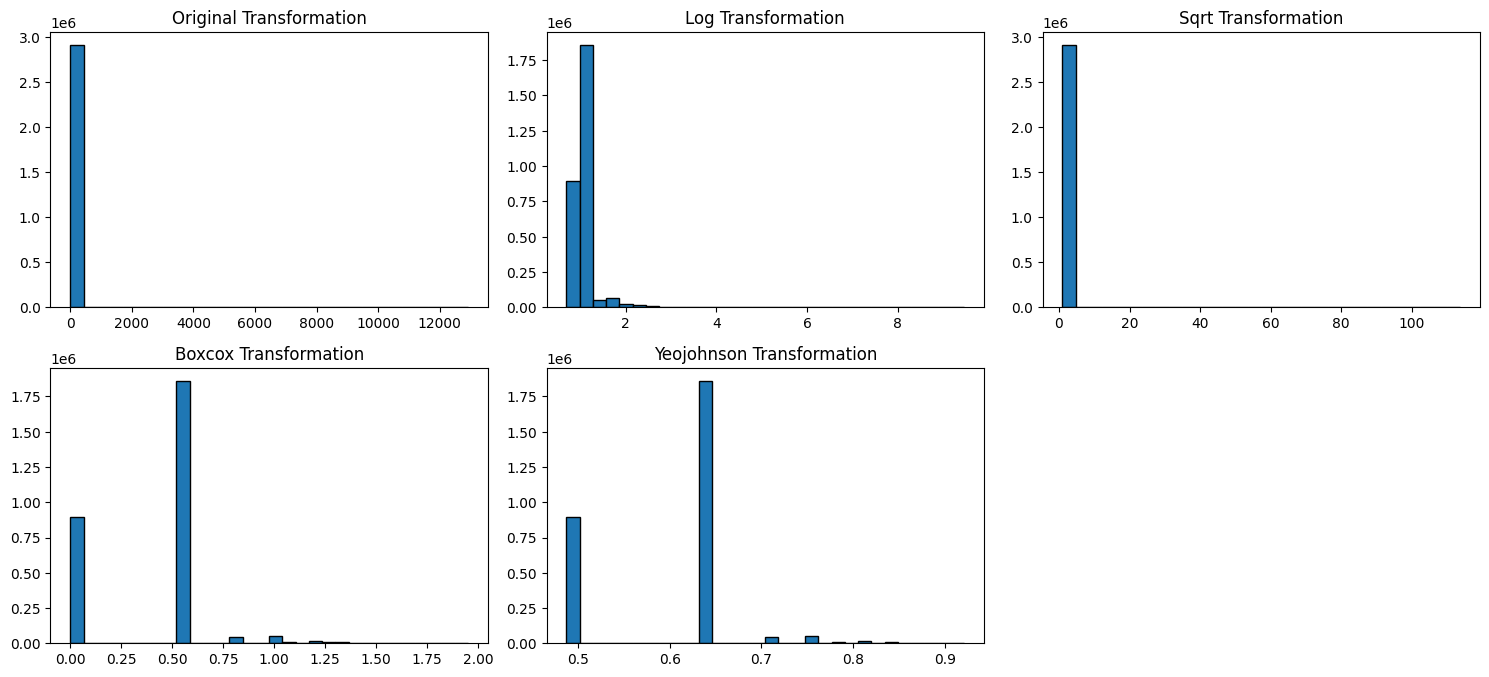

  Transformation                 Skewness              Kurtosis
0       original               293.580787         171458.599367
1            log       [4.52752565820393]   [54.89037065367132]
2           sqrt      [29.41344358935964]  [1861.1144823908521]
3         boxcox   [-0.06356164962227137]  [3.1347531896487175]
4     yeojohnson  [-0.056327629017047756]  [2.9897341487203812]


In [ ]:
# Apply transformations and add to DataFrame
transformations = {
    'log': log_transform,
    'sqrt': sqrt_transform,
    'boxcox': boxcox_transform,
    'yeojohnson': yeojohnson_transform
}

transformed_data_neighbors = {'original': bitcoin_dataset['neighbors']}
for name, func in transformations.items():
    transformed_data_neighbors[name] = bitcoin_dataset[['neighbors']].apply(func)


# Plot histograms of transformed features
plt.figure(figsize=(15, 10))
for i, (name, data) in enumerate(transformed_data_neighbors.items()):
    plt.subplot(3, 3, i + 1)
    plt.hist(data, bins=30, edgecolor='k')
    plt.title(f'{name.capitalize()} Transformation')
plt.tight_layout()
plt.show()

#  Calculate skewness and kurtosis for each transformation
evaluation_metrics = pd.DataFrame(columns=['Transformation', 'Skewness', 'Kurtosis'])

for name, data in transformed_data_neighbors.items():
    skewness = skew(data)
    kurt = kurtosis(data) + 3  # Adjusting to compare with normal kurtosis of 3
    new_row = pd.DataFrame({'Transformation': [name], 'Skewness': [skewness], 'Kurtosis': [kurt]})
    evaluation_metrics = pd.concat([evaluation_metrics, new_row], ignore_index=True)

print(evaluation_metrics)


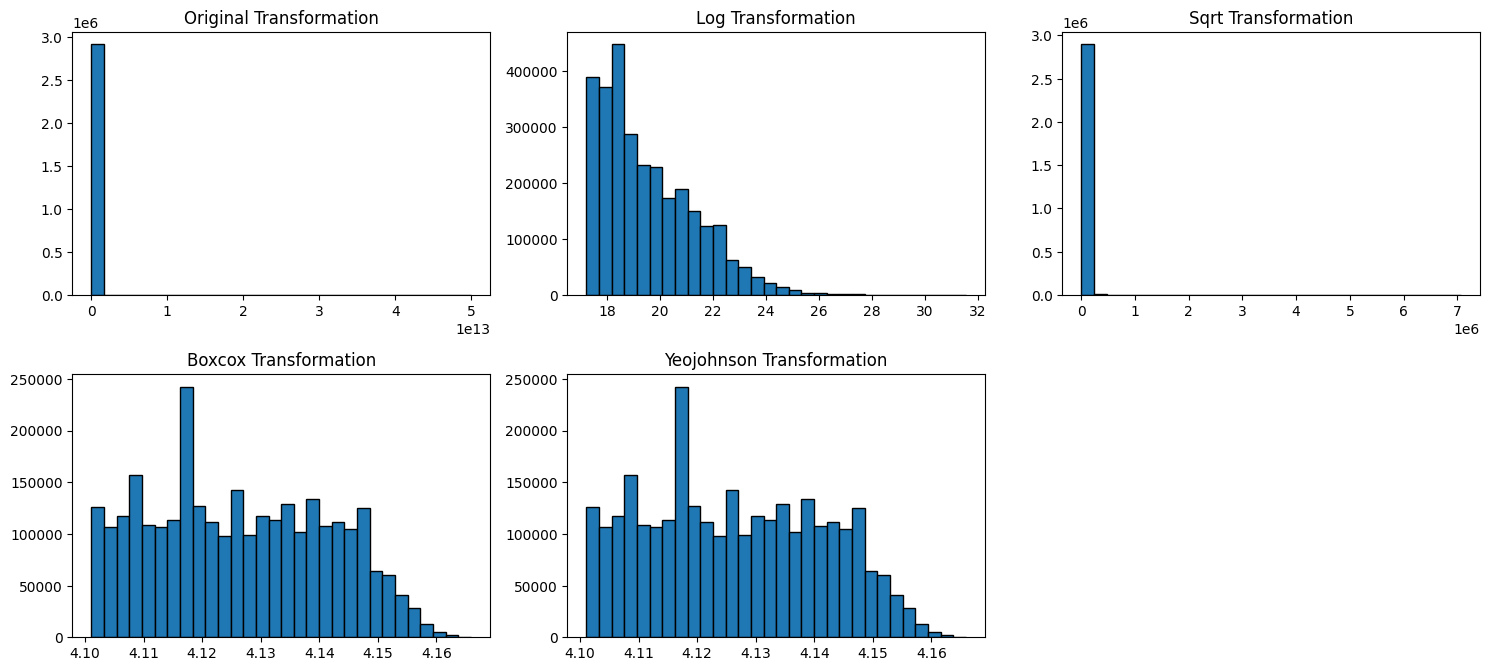

  Transformation               Skewness              Kurtosis
0       original             228.368452          62541.322194
1            log    [0.922789503648722]   [3.521932507184077]
2           sqrt    [27.17426933592576]  [1984.3081536656398]
3         boxcox  [0.15773026847704263]  [1.9518543129928883]
4     yeojohnson   [0.1577303695253696]  [1.9518543758220679]


In [ ]:
# Apply transformations and add to DataFrame
transformations = {
    'log': log_transform,
    'sqrt': sqrt_transform,
    'boxcox': boxcox_transform,
    'yeojohnson': yeojohnson_transform
}

transformed_data_income = {'original': bitcoin_dataset['income']}
for name, func in transformations.items():
    transformed_data_income[name] = bitcoin_dataset[['income']].apply(func)


# Plot histograms of transformed features
plt.figure(figsize=(15, 10))
for i, (name, data) in enumerate(transformed_data_income.items()):
    plt.subplot(3, 3, i + 1)
    plt.hist(data, bins=30, edgecolor='k')
    plt.title(f'{name.capitalize()} Transformation')
plt.tight_layout()
plt.show()

#  Calculate skewness and kurtosis for each transformation
evaluation_metrics = pd.DataFrame(columns=['Transformation', 'Skewness', 'Kurtosis'])

for name, data in transformed_data_income.items():
    skewness = skew(data)
    kurt = kurtosis(data) + 3  # Adjusting to compare with normal kurtosis of 3
    new_row = pd.DataFrame({'Transformation': [name], 'Skewness': [skewness], 'Kurtosis': [kurt]})
    evaluation_metrics = pd.concat([evaluation_metrics, new_row], ignore_index=True)

print(evaluation_metrics)


By comparing skewness and Kurtosis of different transformations, following transformations are applied to features

```

length - yeojohnson
weight - yeojohnson
count - boxcox
looped - boxcox
neighbors - yeojohnson
income  - yeojohnson
```

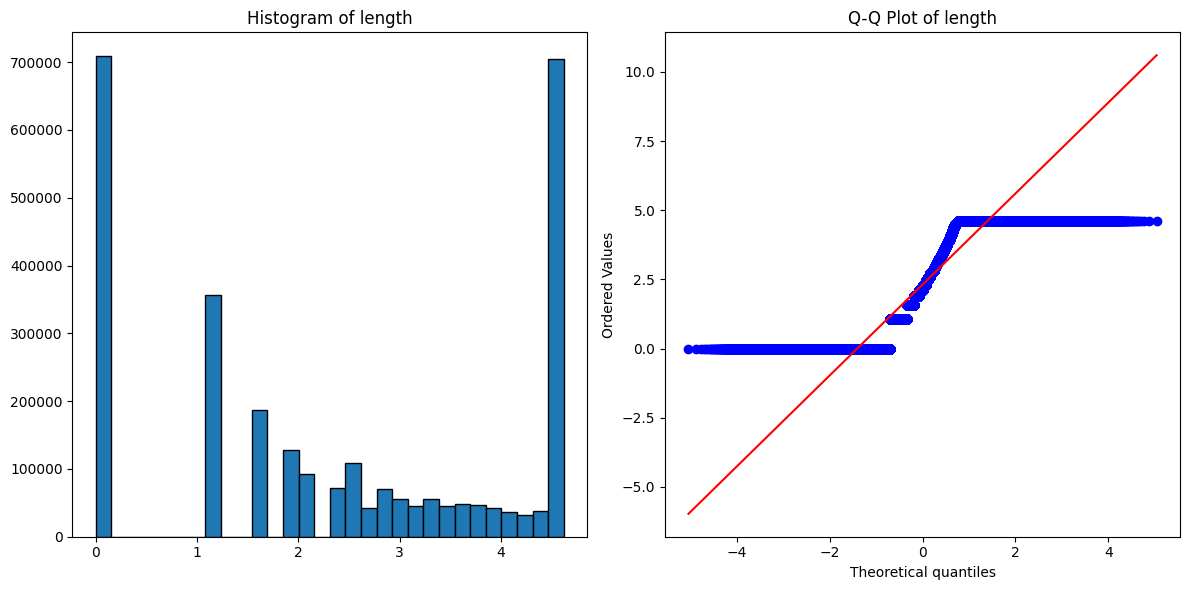

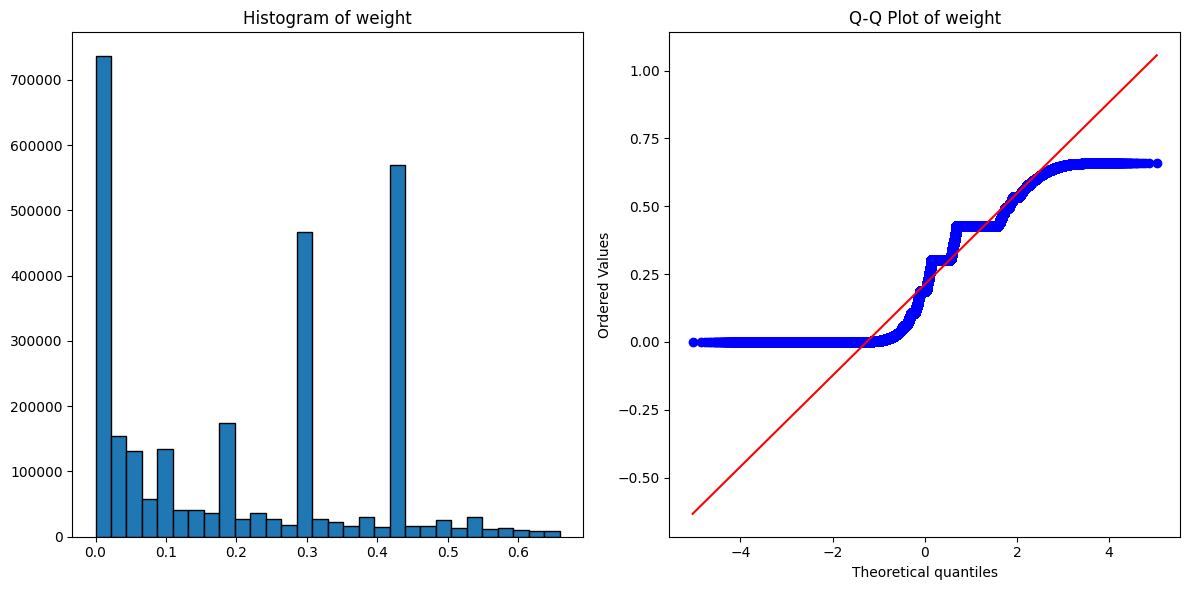

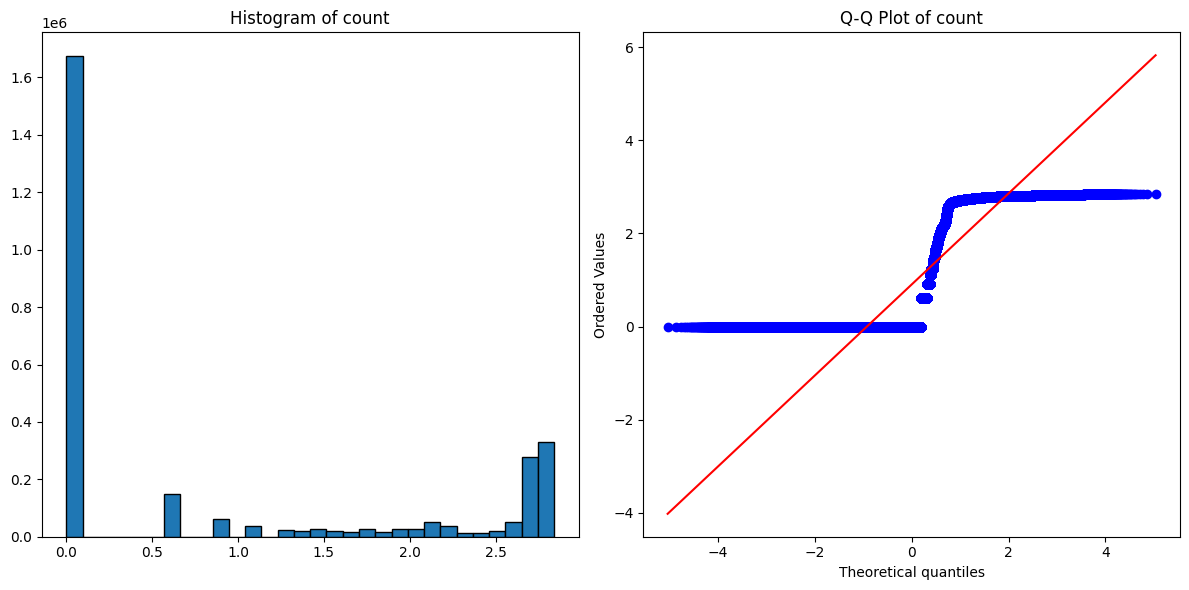

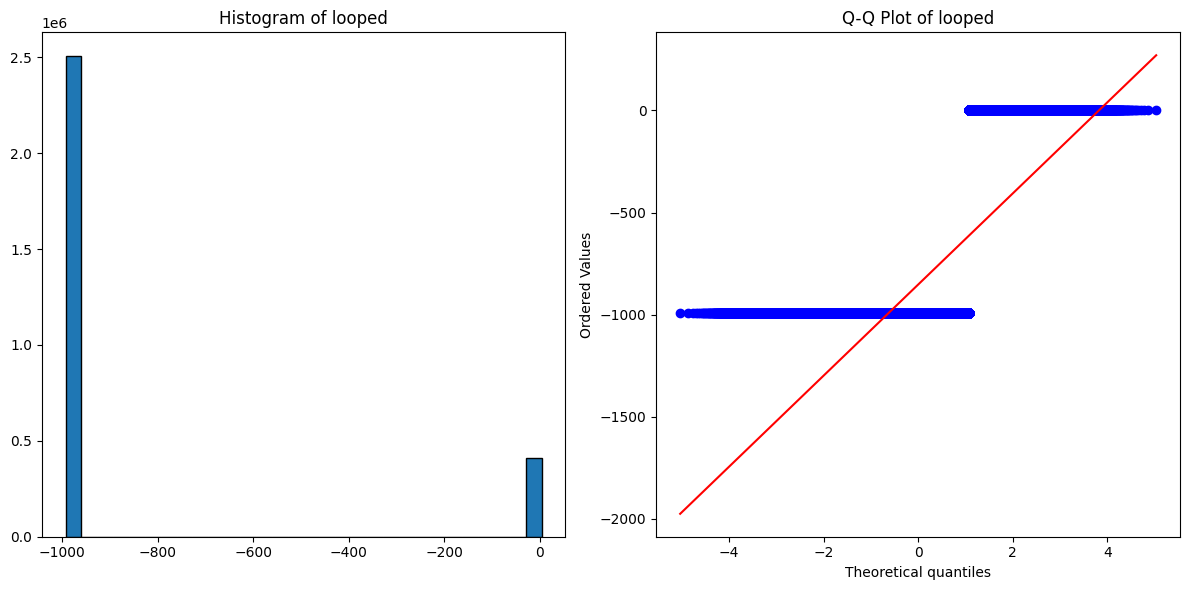

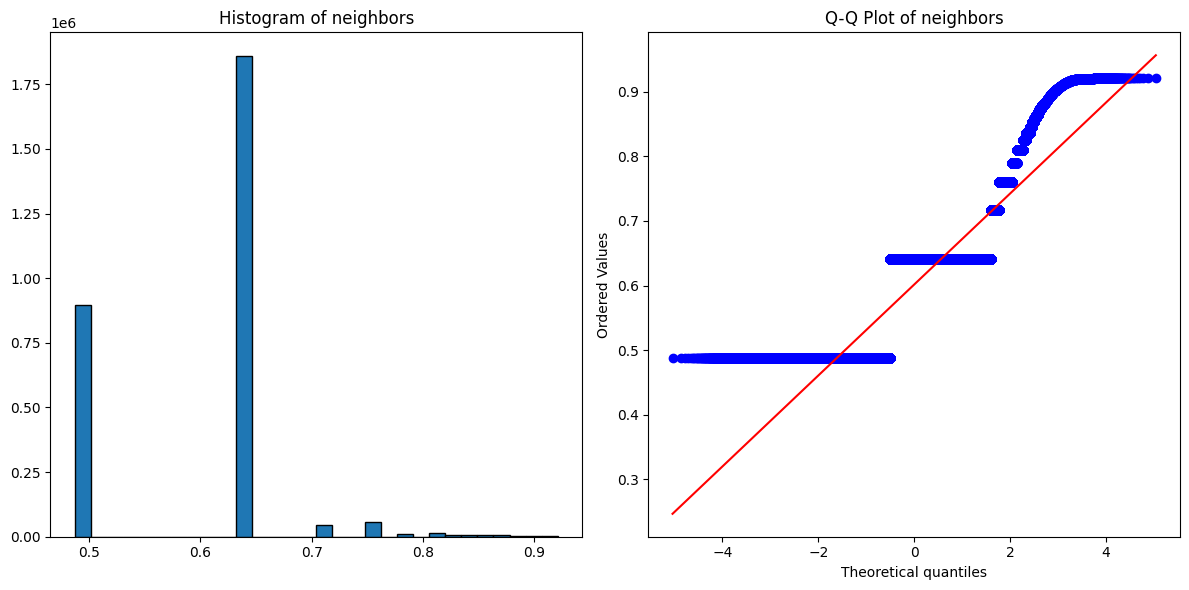

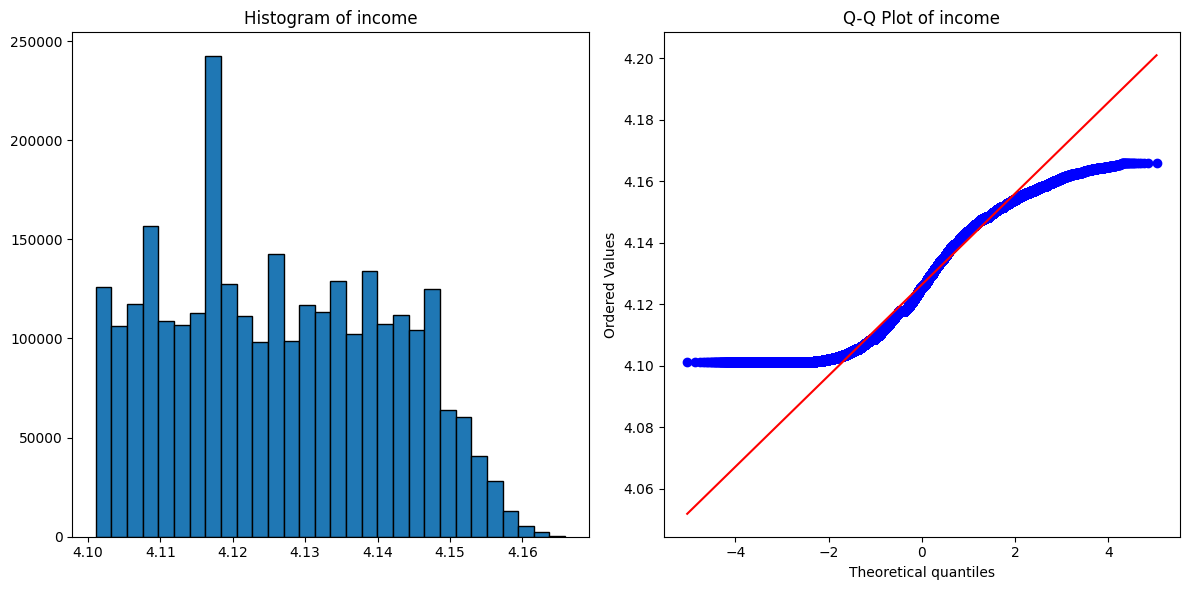

In [ ]:
# Apply specified transformations to the features
bitcoin_dataset['length_transformed'] = yeojohnson_transform(bitcoin_dataset['length'])
bitcoin_dataset['weight_transformed'] = yeojohnson_transform(bitcoin_dataset['weight'])
bitcoin_dataset['count_transformed'] = boxcox_transform(bitcoin_dataset['count'])
bitcoin_dataset['looped_transformed'] = boxcox_transform(bitcoin_dataset['looped'])
bitcoin_dataset['neighbors_transformed'] = yeojohnson_transform(bitcoin_dataset['neighbors'])
bitcoin_dataset['income_transformed'] = yeojohnson_transform(bitcoin_dataset['income'])

# Function to plot histograms and Q-Q plots
def plot_transformations(data, title):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(data, bins=30, edgecolor='k')
    plt.title(f'Histogram of {title}')

    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {title}')

    plt.tight_layout()
    plt.show()

# Plot the transformed features
features = ['length', 'weight', 'count', 'looped', 'neighbors', 'income']
for feature in features:
    plot_transformations(bitcoin_dataset[f'{feature}_transformed'], feature)


Handling Outliers

In [ ]:
from scipy import stats

# Define the threshold for detecting outliers
threshold = 3

# Calculate Z-scores for each transformed feature
z_scores = stats.zscore(bitcoin_dataset[['length_transformed', 'weight_transformed', 'count_transformed', 'looped_transformed', 'neighbors_transformed', 'income_transformed']])

# Identify outliers based on Z-scores
outliers = (np.abs(z_scores) > threshold).any(axis=1)

# Show the indices of outliers
print("Indices of outliers:", np.where(outliers)[0])



Indices of outliers: [    219     223     236 ... 2916580 2916631 2916694]


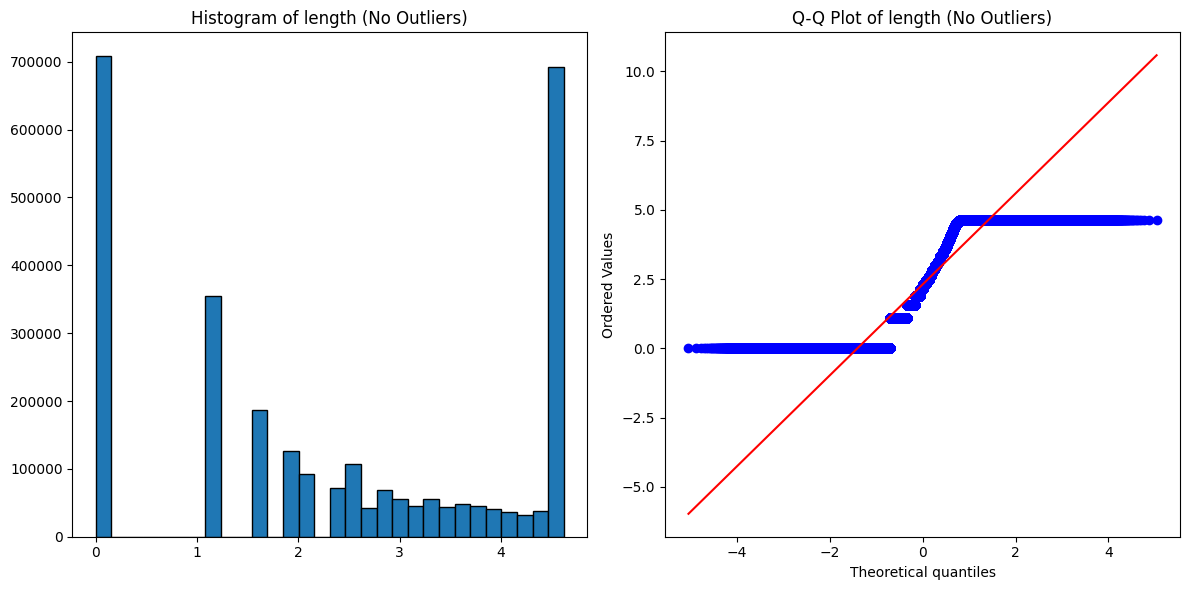

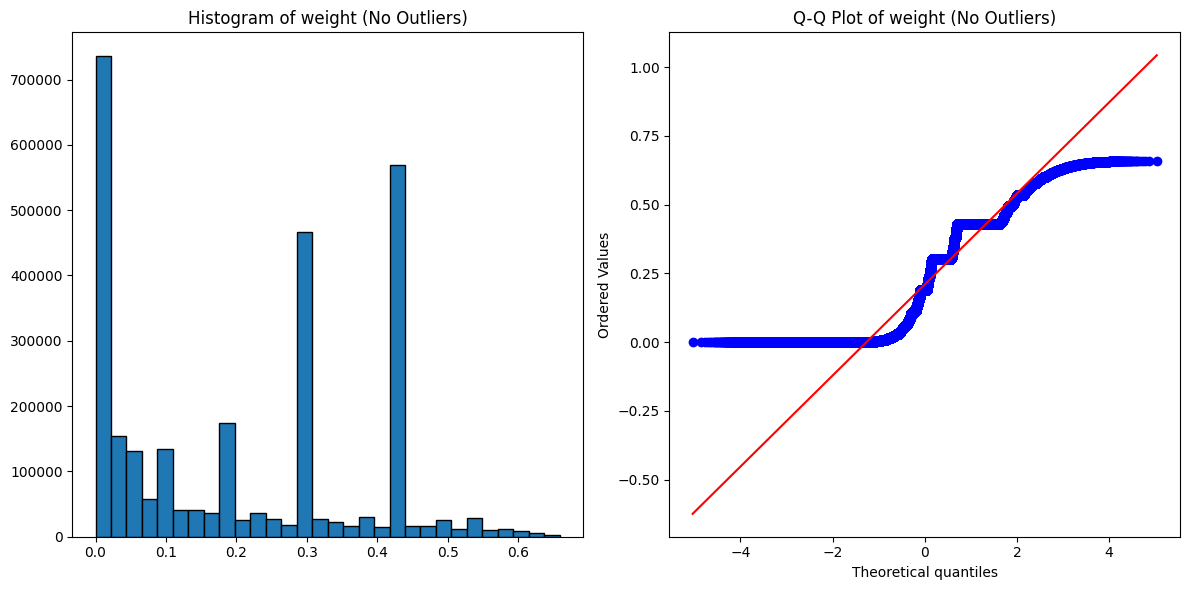

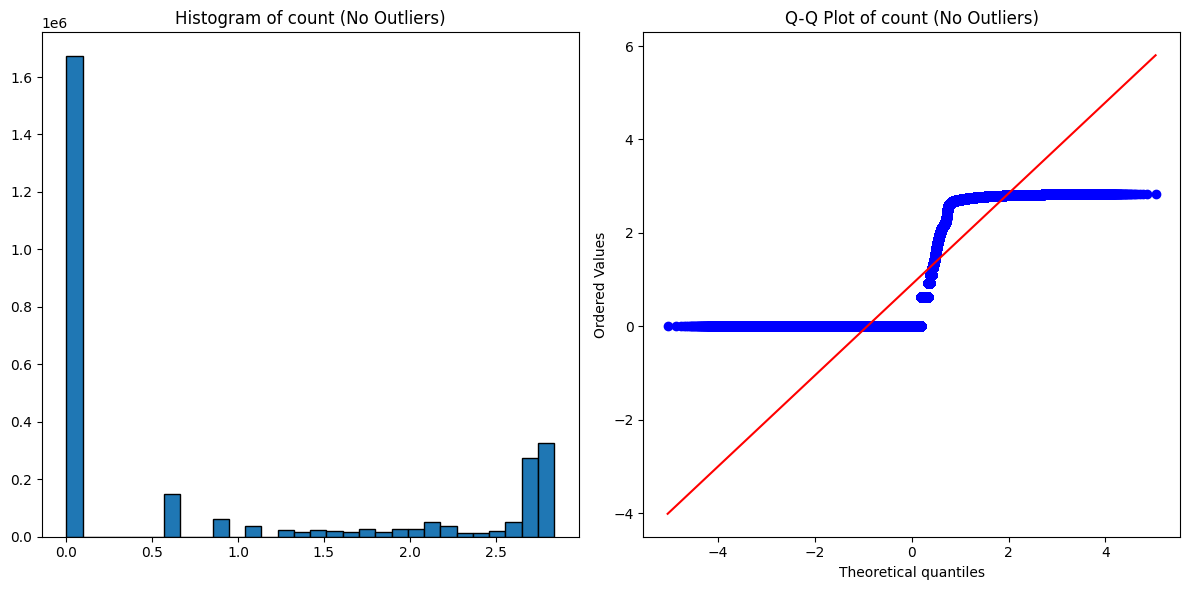

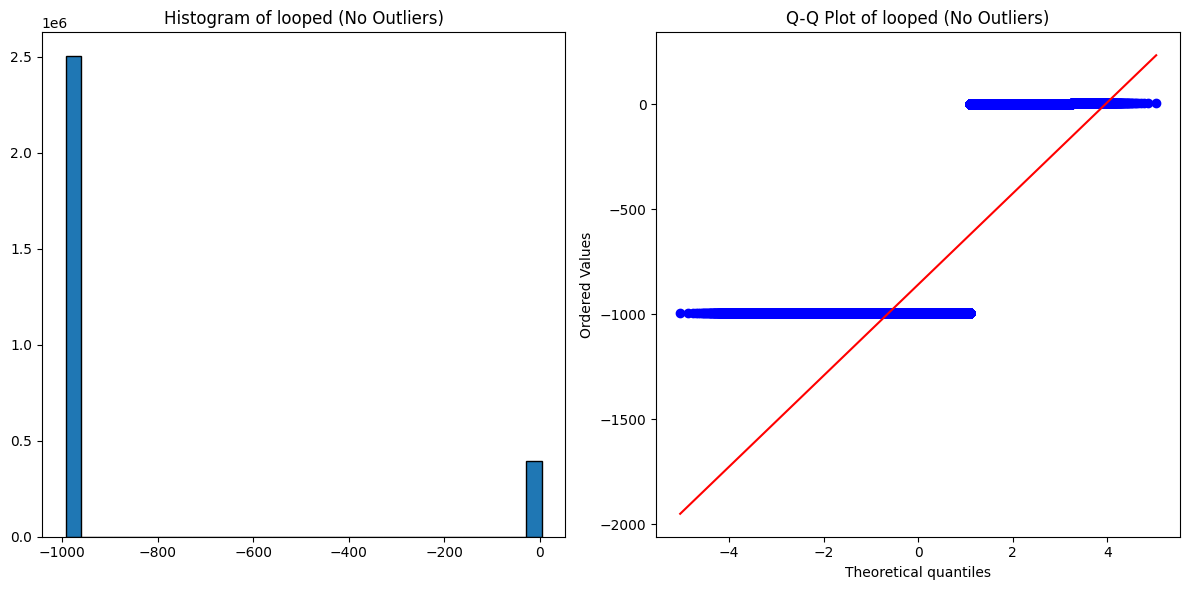

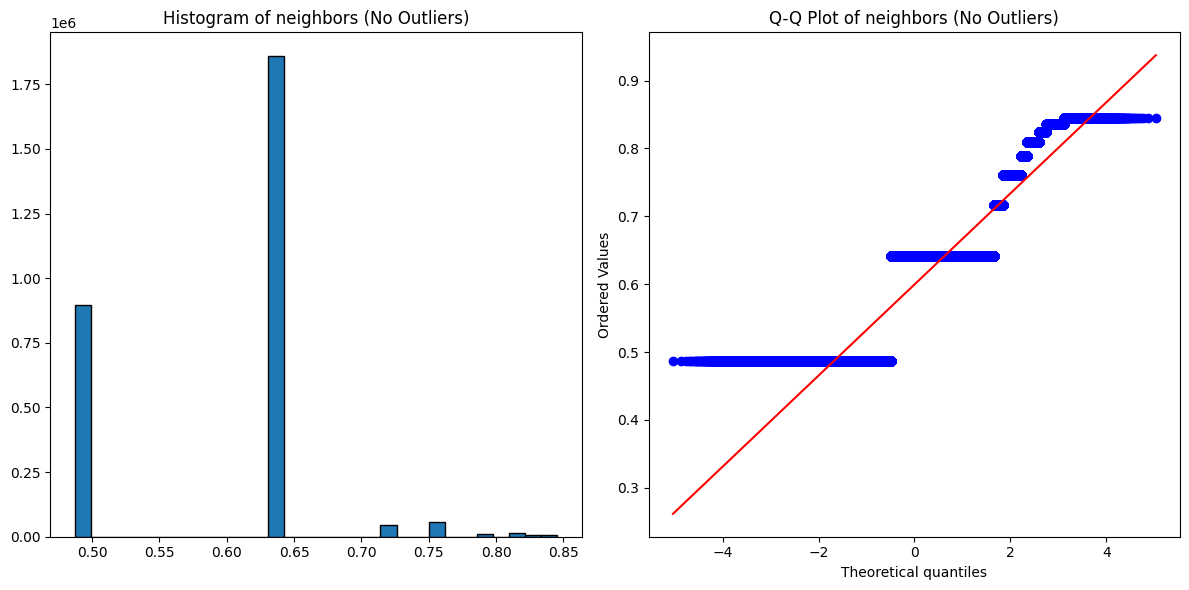

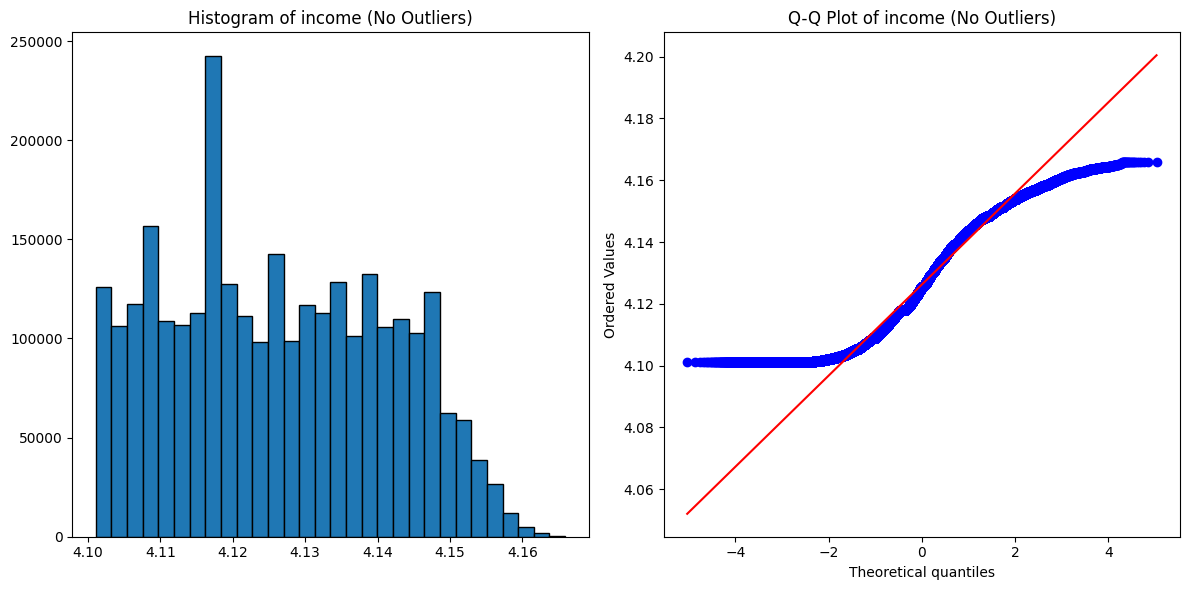

In [ ]:
# Remove outliers from the dataset
bitcoin_dataset_no_outliers = bitcoin_dataset[~outliers]

# Visualize the transformed features after removing outliers
for feature in features:
    plot_transformations(bitcoin_dataset_no_outliers[f'{feature}_transformed'], f'{feature} (No Outliers)')


In [ ]:
print(len(bitcoin_dataset))
print(len(bitcoin_dataset_no_outliers))

2916697
2895755


In [ ]:
bitcoin_dataset.head()

,address,year,day,length,weight,count,looped,neighbors,income,label,Binary_Label,length_transformed,weight_transformed,count_transformed,looped_transformed,neighbors_transformed,income_transformed
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,princetonCerber,1,2.817168,0.008247,1.000000e-09,-993.329103,0.641675,4.117890
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,princetonLocky,1,3.595750,0.000244,1.000000e-09,-993.329103,0.487116,4.117884
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,princetonCerber,1,-0.000000,0.428792,1.000000e-09,-993.329103,0.641675,4.125573
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,princetonCerber,1,4.023807,0.003887,1.000000e-09,-993.329103,0.641675,4.113623
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,princetonLocky,1,4.620371,0.066695,2.583543e+00,-993.329103,0.487116,4.125573


In [ ]:
# Construct the dataset using transformed features with renamed columns
bitcoin_df = bitcoin_dataset_no_outliers[['year', 'day', 'length_transformed', 'weight_transformed', 'count_transformed', 'looped_transformed', 'neighbors_transformed', 'income_transformed','Binary_Label']].copy()

# Rename the columns
bitcoin_df.columns = ['year', 'day', 'length', 'weight', 'count', 'looped', 'neighbors', 'income','label']

# Print the DataFrame
print(bitcoin_df.head())


   year  day    length    weight         count      looped  neighbors  \
0  2017   11  2.817168  0.008247  1.000000e-09 -993.329103   0.641675   
1  2016  132  3.595750  0.000244  1.000000e-09 -993.329103   0.487116   
2  2016  246 -0.000000  0.428792  1.000000e-09 -993.329103   0.641675   
3  2016  322  4.023807  0.003887  1.000000e-09 -993.329103   0.641675   
4  2016  238  4.620371  0.066695  2.583543e+00 -993.329103   0.487116   

     income  label  
0  4.117890      1  
1  4.117884      1  
2  4.125573      1  
3  4.113623      1  
4  4.125573      1  


Feature Scaling:

For the four different models - SVM, Logistic Regression, XGBoost, and Random Forest - the choice of scalers may vary depending on the characteristics of your data and the algorithms themselves. Here's a general guideline for selecting scalers for each model:

### SVM:
- **Scaler**: MinMaxScaler or StandardScaler.
- **Reasoning**: SVM is sensitive to the scale of the features since it uses a distance-based metric to classify data points. Scaling the features to a similar range can improve the performance of SVM. MinMaxScaler may be preferable if you're using SVM with a kernel like RBF, as it bounds the data to a fixed range, preventing large values from dominating the distance calculations.

### Logistic Regression:
- **Scaler**: StandardScaler.
- **Reasoning**: Logistic Regression typically assumes that features are normally distributed. StandardScaler, which scales the data to have a mean of 0 and a standard deviation of 1, aligns with this assumption and is commonly used with logistic regression. It preserves the shape of the distribution and is suitable for linear models.

### XGBoost:
- **Scaler**: None or MinMaxScaler.
- **Reasoning**: XGBoost is a tree-based ensemble method and is inherently robust to the scale of features. You can choose not to scale the features when using XGBoost. However, if you want to scale the features, MinMaxScaler can be used to bound the features to a specific range, ensuring consistency across the trees.

### Random Forest:
- **Scaler**: None or MinMaxScaler.
- **Reasoning**: Similar to XGBoost, Random Forest is a tree-based ensemble method and is not sensitive to the scale of features. You can choose not to scale the features when using Random Forest. However, if you prefer to scale the features, MinMaxScaler can be used for consistency across the trees.

### Final Considerations:
- For SVM and Logistic Regression, scaling is generally recommended to improve performance.
- For tree-based models like XGBoost and Random Forest, scaling is optional and may not significantly impact performance. However, if you prefer consistency or plan to compare results with other models, you can use MinMaxScaler.

It's important to experiment with different scalers and evaluate their effects on model performance using cross-validation or other validation techniques to determine the optimal approach for your specific dataset and modeling goals.

In [ ]:
# Select the numerical features to scale
numerical_features = ['length', 'weight', 'count', 'looped', 'neighbors', 'income']

# Initialize the scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Scale the features using StandardScaler
standard_scaled_features = standard_scaler.fit_transform(bitcoin_df[numerical_features])

# Scale the features using MinMaxScaler
minmax_scaled_features = minmax_scaler.fit_transform(bitcoin_df[numerical_features])

# Create DataFrames with scaled features
standard_scaled_df = pd.DataFrame(standard_scaled_features, columns=numerical_features)
minmax_scaled_df = pd.DataFrame(minmax_scaled_features, columns=numerical_features)

# Concatenate the scaled features with non-scaled features
standard_scaled_df = pd.concat([bitcoin_df.drop(columns=numerical_features), standard_scaled_df], axis=1)
minmax_scaled_df = pd.concat([bitcoin_df.drop(columns=numerical_features), minmax_scaled_df], axis=1)

# Print the first few rows of the scaled DataFrames
print("Standard Scaled DataFrame:")
print(standard_scaled_df.head())

print("\nMinMax Scaled DataFrame:")
print(minmax_scaled_df.head())



Standard Scaled DataFrame:
     year    day  label    length    weight     count    looped  neighbors  \
0  2017.0   11.0    1.0  0.290905 -1.139795 -0.767030 -0.395908   0.527530   
1  2016.0  132.0    1.0  0.732148 -1.185167 -0.767030 -0.395908  -1.407922   
2  2016.0  246.0    1.0 -1.305660  1.244529 -0.767030 -0.395908   0.527530   
3  2016.0  322.0    1.0  0.974739 -1.164512 -0.767030 -0.395908   0.527530   
4  2016.0  238.0    1.0  1.312828 -0.808415  1.449737 -0.395908  -1.407922   

     income  
0 -0.558012  
1 -0.558413  
2 -0.045499  
3 -0.842672  
4 -0.045499  

MinMax Scaled DataFrame:
     year    day  label    length    weight     count  looped  neighbors  \
0  2017.0   11.0    1.0  0.609728  0.012518  0.000000     0.0    0.43121   
1  2016.0  132.0    1.0  0.778238  0.000370  0.000000     0.0    0.00000   
2  2016.0  246.0    1.0  0.000000  0.650865  0.000000     0.0    0.43121   
3  2016.0  322.0    1.0  0.870884  0.005900  0.000000     0.0    0.43121   
4  2016.0  238

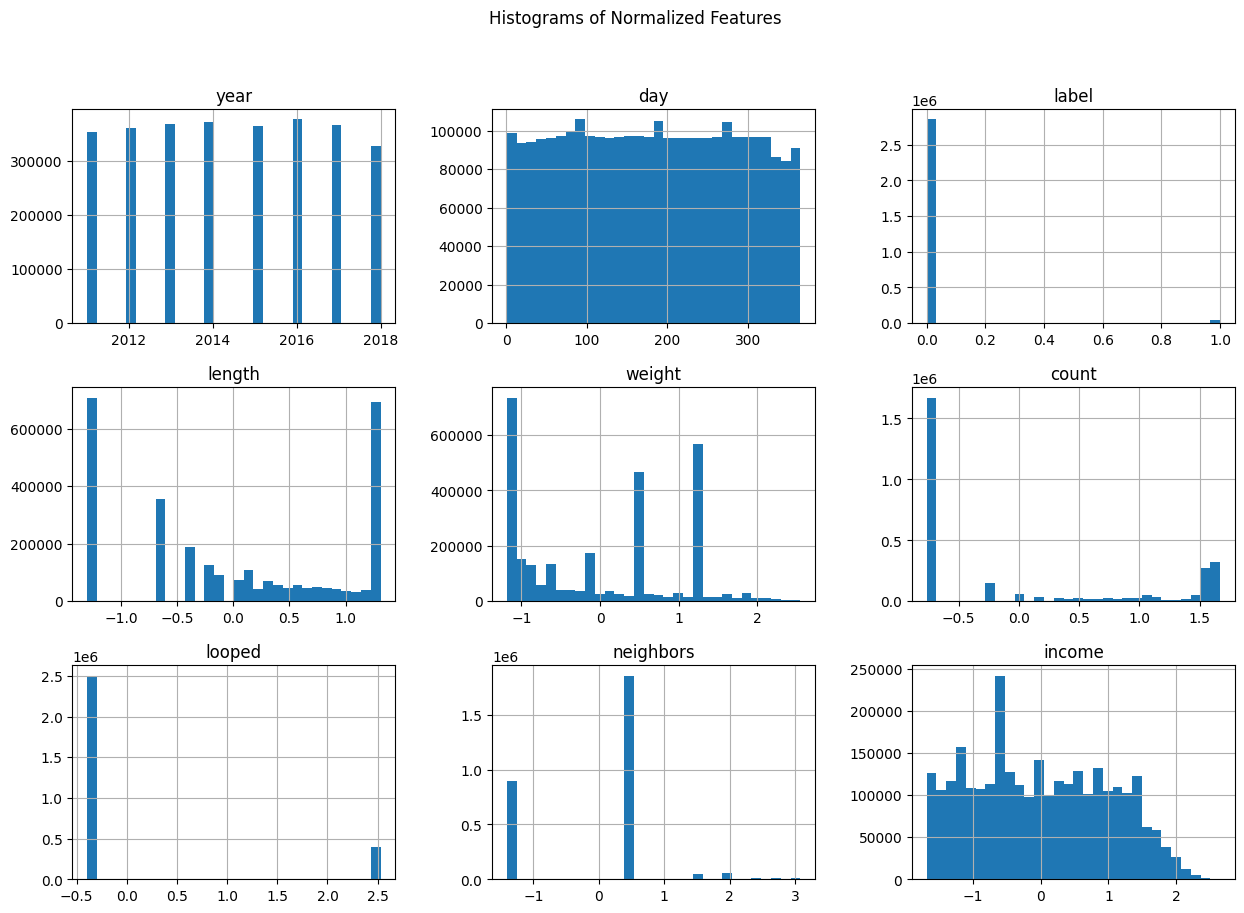

In [ ]:
# Plot histograms after normalization
standard_scaled_df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Normalized Features')
plt.show()


Explained Variance Ratio:
[9.99967563e-01 2.83693460e-05 3.81474491e-06 2.04285591e-07
 4.64997058e-08 1.87258619e-09]


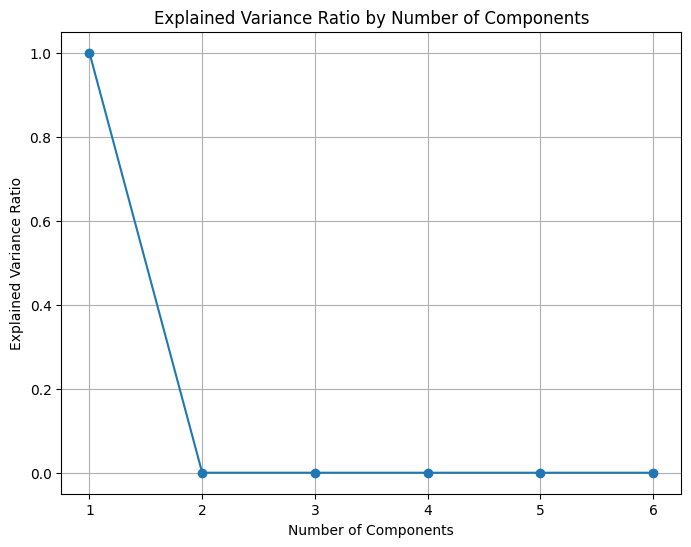

In [ ]:
from sklearn.decomposition import PCA

# Assume bitcoin_df is your DataFrame containing the features
# Select the numerical features to apply PCA
numerical_features = ['length', 'weight', 'count', 'looped', 'neighbors', 'income']

# Extract the numerical features
X = bitcoin_df[numerical_features]

# Initialize PCA with the desired number of components
pca = PCA()

# Fit PCA to the feature matrix
pca.fit(X)

# Print the explained variance ratio of each component
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Plot the explained variance ratio
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()


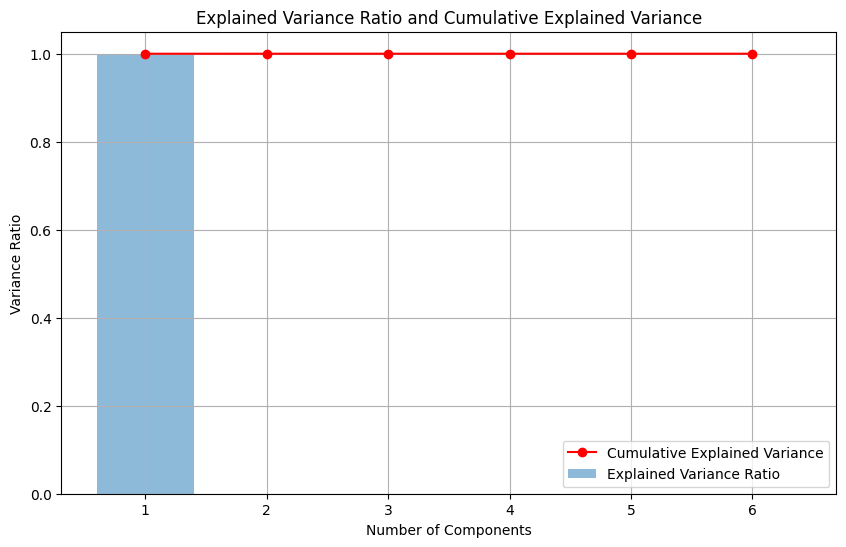

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cumulative sum of explained variance ratios
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance ratio and cumulative variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Explained Variance Ratio')
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_variance_ratio, marker='o', linestyle='-', color='r', label='Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Variance Ratio')
plt.title('Explained Variance Ratio and Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.decomposition import PCA

# Assume bitcoin_df is your DataFrame containing the features
# Select the numerical features to apply PCA
numerical_features = ['length', 'weight', 'count', 'looped', 'neighbors', 'income']

# Extract the numerical features
X = bitcoin_df[numerical_features]

# Initialize PCA with the desired number of components
pca = PCA(n_components=2)  # You can specify the number of components you want to retain

# Fit PCA to the feature matrix
pca.fit(X)

# Transform the feature matrix to its principal components
X_pca = pca.transform(X)

# X_pca will contain the reduced-dimensional representation of the data
data_sf = pd.DataFrame(X_pca)
data_sf.head()

,0,1
0,-134.921156,-0.377379
1,-134.919626,-1.063140
2,-134.926757,2.125154
3,-134.918770,-1.441686
4,-134.913543,-3.176640


Under Sampling, over sampling and combination

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split

# Assuming 'target' is the name of your target variable column
target = 'label'

# Split the data into features (X) and target (y)
X = bitcoin_df.drop(columns=[target])
y = bitcoin_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the resamplers
undersample = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)
smoteenn = SMOTEENN(random_state=42)

# Apply undersampling
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

# Apply oversampling (SMOTE)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# Apply combination (SMOTE + ENN)
X_train_combined, y_train_combined = smoteenn.fit_resample(X_train, y_train)

# Print the number of samples after resampling
print("Number of samples after undersampling:", X_train_under.shape[0])
print("Number of samples after oversampling (SMOTE):", X_train_over.shape[0])
print("Number of samples after combination (SMOTE + ENN):", X_train_combined.shape[0])

# Optionally, you can also inspect the class distribution after resampling
print("\nClass distribution after undersampling:")
print(pd.Series(y_train_under).value_counts())

print("\nClass distribution after oversampling (SMOTE):")
print(pd.Series(y_train_over).value_counts())

print("\nClass distribution after combination (SMOTE + ENN):")
print(pd.Series(y_train_combined).value_counts())
